In [10]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import calendar
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore') #remove warning

In [4]:
df = pd.read_csv("I:/Massi/Documents/GitHub/NeoMeetup/Csv/Exported_queries/Distribuzione_temporale_eventi_fix.csv")
df.head()

,Unnamed: 0,Name,Country,State,Lat,Lon,timezone_str,timestamp,Time,datetime_timezoned
0,0,\tAnnual New Year's Resolution Hiking Pedernal...,us,tx,29.46,-98.67,America/Chicago,1.556708e+09,2019-05-01 13:00:00,01/05/2019 06:00:00
1,1,\tDance for Kids 7-12,us,az,32.22,-110.89,America/Phoenix,1.551478e+09,2019-03-01 23:00:00,01/03/2019 15:00:00
2,2,\tEasy Four Mile Creek Greenway MATTHEWS,us,nc,35.29,-80.78,America/New_York,1.546105e+09,2018-12-29 18:30:00,29/12/2018 13:00:00
3,3,\tGIRLS NIGHT OUT !!! MEN IN MOTION MALE REVIE...,us,ct,41.77,-72.67,America/New_York,1.550358e+09,2019-02-17 00:00:00,16/02/2019 18:00:00
4,4,\tSpeak EZ Toastemasters,us,tx,32.96,-96.75,America/Chicago,1.545952e+09,2018-12-28 00:00:00,27/12/2018 17:00:00


In [7]:
tmp = df['datetime_timezoned'].str.split(" ", n = 1, expand = True) #create distinct columns date and time
df['day'] = [calendar.day_name[dt.strptime(date, '%d/%m/%Y').weekday()] for date in tmp[0]] #transform date into day
df['time'] = tmp[1] #take time
df.head()

,Unnamed: 0,Name,Country,State,Lat,Lon,timezone_str,timestamp,Time,datetime_timezoned,day,time
0,0,\tAnnual New Year's Resolution Hiking Pedernal...,us,tx,29.46,-98.67,America/Chicago,1.556708e+09,2019-05-01 13:00:00,01/05/2019 06:00:00,Wednesday,06:00:00
1,1,\tDance for Kids 7-12,us,az,32.22,-110.89,America/Phoenix,1.551478e+09,2019-03-01 23:00:00,01/03/2019 15:00:00,Friday,15:00:00
2,2,\tEasy Four Mile Creek Greenway MATTHEWS,us,nc,35.29,-80.78,America/New_York,1.546105e+09,2018-12-29 18:30:00,29/12/2018 13:00:00,Saturday,13:00:00
3,3,\tGIRLS NIGHT OUT !!! MEN IN MOTION MALE REVIE...,us,ct,41.77,-72.67,America/New_York,1.550358e+09,2019-02-17 00:00:00,16/02/2019 18:00:00,Saturday,18:00:00
4,4,\tSpeak EZ Toastemasters,us,tx,32.96,-96.75,America/Chicago,1.545952e+09,2018-12-28 00:00:00,27/12/2018 17:00:00,Thursday,17:00:00


In [9]:
df_date = df[['day','time']] #define new dataframe for explore with viz
df_date.head() #check

,day,time
0,Wednesday,06:00:00
1,Friday,15:00:00
2,Saturday,13:00:00
3,Saturday,18:00:00
4,Thursday,17:00:00


In [12]:
df_date['day'] = pd.Categorical(df_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_date.pivot_table(values = 'values', index = 'day', columns = 'time', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table

time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
day,,,,,,,,,,,,,,,,,,,,,
Monday,18,1,2,15,52,199,396,592,966,1244,...,425,560,1203,4749,8731,2738,1058,396,113,71
Tuesday,12,6,5,9,53,201,592,766,913,1107,...,371,540,1172,4993,8405,2125,507,140,64,34
Wednesday,4,3,3,7,47,210,553,1131,1662,2448,...,880,731,1309,4673,7817,2056,367,117,54,40
Thursday,11,7,4,7,54,161,617,804,785,866,...,342,528,1342,5851,11090,4518,854,181,75,55
Friday,13,7,3,15,69,191,522,748,1064,1287,...,524,672,1243,4061,7436,3621,943,383,144,92
Saturday,30,12,14,14,73,239,622,1431,2852,4529,...,2000,1475,1550,3088,5995,2355,740,297,106,50
Sunday,16,7,7,15,42,178,536,1140,2207,3754,...,2156,1774,1898,3710,5522,1659,329,139,77,70


In [27]:
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size

Text(141.0, 0.5, 'Weekdays')

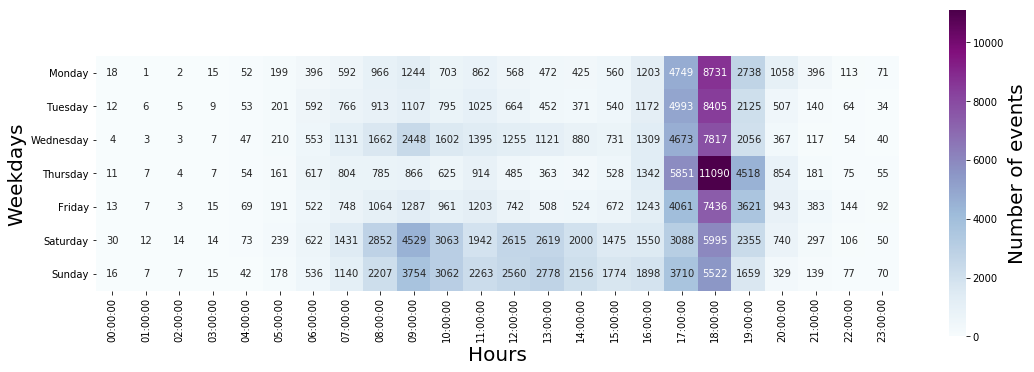

In [38]:
figure = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
figure.figure.axes[-1].yaxis.label.set_size(20)
figure.set_xlabel("Hours", fontsize=20)
figure.set_ylabel("Weekdays", fontsize=20)